In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playergamelog
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_seq_items', None)

In [3]:
# Find players by full name.
players.find_players_by_full_name('james')

[{'id': 202341,
  'full_name': 'James Anderson',
  'first_name': 'James',
  'last_name': 'Anderson',
  'is_active': False},
 {'id': 200788,
  'full_name': 'James Augustine',
  'first_name': 'James',
  'last_name': 'Augustine',
  'is_active': False},
 {'id': 76085,
  'full_name': 'James Bailey',
  'first_name': 'James',
  'last_name': 'Bailey',
  'is_active': False},
 {'id': 1806,
  'full_name': 'James Blackwell',
  'first_name': 'James',
  'last_name': 'Blackwell',
  'is_active': False},
 {'id': 1630547,
  'full_name': 'James Bouknight',
  'first_name': 'James',
  'last_name': 'Bouknight',
  'is_active': True},
 {'id': 1530,
  'full_name': 'James Collins',
  'first_name': 'James',
  'last_name': 'Collins',
  'is_active': False},
 {'id': 1526,
  'full_name': 'James Cotton',
  'first_name': 'James',
  'last_name': 'Cotton',
  'is_active': False},
 {'id': 201191,
  'full_name': 'JamesOn Curry',
  'first_name': 'JamesOn',
  'last_name': 'Curry',
  'is_active': False},
 {'id': 76524,
  'ful

In [4]:
# Find players by last name.
players.find_players_by_last_name('^(james|love)$')

[{'id': 77115,
  'full_name': 'Aaron James',
  'first_name': 'Aaron',
  'last_name': 'James',
  'is_active': False},
 {'id': 203108,
  'full_name': 'Bernard James',
  'first_name': 'Bernard',
  'last_name': 'James',
  'is_active': False},
 {'id': 202345,
  'full_name': 'Damion James',
  'first_name': 'Damion',
  'last_name': 'James',
  'is_active': False},
 {'id': 77116,
  'full_name': 'Gene James',
  'first_name': 'Gene',
  'last_name': 'James',
  'is_active': False},
 {'id': 1080,
  'full_name': 'Henry James',
  'first_name': 'Henry',
  'last_name': 'James',
  'is_active': False},
 {'id': 1744,
  'full_name': 'Jerome James',
  'first_name': 'Jerome',
  'last_name': 'James',
  'is_active': False},
 {'id': 1629713,
  'full_name': 'Justin James',
  'first_name': 'Justin',
  'last_name': 'James',
  'is_active': False},
 {'id': 2544,
  'full_name': 'LeBron James',
  'first_name': 'LeBron',
  'last_name': 'James',
  'is_active': True},
 {'id': 2229,
  'full_name': 'Mike James',
  'first_na

In [5]:
# Find players by first name.
players.find_players_by_first_name('lebron')

[{'id': 2544,
  'full_name': 'LeBron James',
  'first_name': 'LeBron',
  'last_name': 'James',
  'is_active': True}]

In [6]:
# Get all players.
#players.get_players()

In [7]:
# Fetching career statistics for Player of Choice using his player ID
player_career = playercareerstats.PlayerCareerStats(player_id='2544')
player_career_df = player_career.get_data_frames()[0]

# Extracting the seasons of player of choice
seasons_played = player_career_df['SEASON_ID'].unique()
print(seasons_played.tolist())

['2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23', '2023-24']


In [8]:
# Initialize an empty DataFrame to store all game logs
lebron = pd.DataFrame()

# List of seasons to loop through (update this list as needed)
seasons = ['2019-20', '2020-21', '2021-22', '2022-23', '2023-24']

# Fetch game logs for each season and add a 'SEASON' column
for season in seasons:
    player_logs = playergamelog.PlayerGameLog(player_id='2544', season=season)
    season_logs_df = player_logs.get_data_frames()[0]
    season_logs_df['SEASON'] = season  
    lebron = pd.concat([lebron, season_logs_df], ignore_index=True)

In [9]:
lebron.head(3)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,SEASON
0,22019,2544,0021901310,"AUG 13, 2020",LAL vs. SAC,L,15,6,13,0.462,2,5,0.400,3,3,1.0,1,2,3,4,0,0,3,0,17,-13,1,2019-20
1,22019,2544,0021901296,"AUG 10, 2020",LAL vs. DEN,W,38,9,21,0.429,5,11,0.455,6,10,0.6,0,1,1,12,0,2,5,0,29,-10,1,2019-20
2,22019,2544,0021901282,"AUG 08, 2020",LAL @ IND,L,35,13,24,0.542,2,6,0.333,3,6,0.5,1,7,8,7,0,1,1,4,31,14,1,2019-20


In [10]:
lebron['GAME_DATE'].str.split(' ', expand=True)[0].unique()

array(['AUG', 'JUL', 'MAR', 'FEB', 'JAN', 'DEC', 'NOV', 'OCT', 'MAY',
       'APR'], dtype=object)

In [11]:
lebron['GAME_DATE'].replace({'JAN':'01', 'FEB':'02', 'MAR':'03', 'APR':'04', 'MAY':'05', 
                                          'JUL':'07', 'AUG':'08', 'OCT':'10', 'NOV':'11', 'DEC':'12',
                                          ',':''}, regex=True, inplace=True)

In [12]:
lebron['GAME_DATE'].str.split(' ', expand=True).head(3)

,0,1,2
0,08,13,2020
1,08,10,2020
2,08,08,2020


In [13]:
lebron['YEAR'] = lebron['GAME_DATE'].str.split(' ', expand=True)[2]
lebron['MONTH'] = lebron['GAME_DATE'].str.split(' ', expand=True)[0]
lebron['DAY'] = lebron['GAME_DATE'].str.split(' ', expand=True)[1]

In [14]:
lebron['GAME_DATE'] = lebron['YEAR']+'-'+lebron['MONTH']+'-'+lebron['DAY']

In [15]:
lebron['GAME_DATE'].unique()[:10]

array(['2020-08-13', '2020-08-10', '2020-08-08', '2020-08-05',
       '2020-08-03', '2020-08-01', '2020-07-30', '2020-03-10',
       '2020-03-08', '2020-03-06'], dtype=object)

In [16]:
# Convert Game_Date to a datetime
lebron['GAME_DATE'] = pd.to_datetime(lebron['GAME_DATE'],  format='%Y-%m-%d')
# Create Month_Year to faciliate Month/Date Analysis
lebron['MONTH_YEAR'] = lebron['GAME_DATE'].dt.to_period('M')

In [17]:
#Aggregate game level data to yearly
yearly_stats = lebron.groupby('YEAR').agg({
    'FGM': 'sum', 
    'FGA': 'sum', 
    'FG3M': 'sum', 
    'FG3A': 'sum', 
    'FTM': 'sum', 
    'FTA': 'sum', 
}).reset_index()

# This takes the field goals made and attempted to calculate field goal percent
yearly_stats['FG_PCT'] = yearly_stats['FGM'] / yearly_stats['FGA']
yearly_stats['FG3_PCT'] = yearly_stats['FG3M'] / yearly_stats['FG3A']
yearly_stats['FT_PCT'] = yearly_stats['FTM'] / yearly_stats['FTA']
yearly_stats['GAMES'] = lebron.groupby('YEAR')['Game_ID'].count().values

In [18]:
yearly_stats

,YEAR,FGM,FGA,FG3M,FG3A,FTM,FTA,FG_PCT,FG3_PCT,FT_PCT,GAMES
0,2019,308,632,69,200,119,173,0.487342,0.345000,0.687861,32
1,2020,378,762,90,256,165,236,0.496063,0.351562,0.699153,40
2,2021,646,1241,167,451,264,364,0.520548,0.370288,0.725275,65
3,2022,686,1331,146,442,261,349,0.515402,0.330317,0.747851,59
4,2023,588,1146,132,357,272,356,0.513089,0.369748,0.764045,58
5,2024,233,451,51,126,79,112,0.516630,0.404762,0.705357,24


In [19]:
# Calculate Cummulative Sum
lebron['FG3M_CUMSUM'] = lebron.groupby('YEAR')['FG3M'].cumsum()
lebron['FGM_CUMSUM'] = lebron.groupby('YEAR')['FGM'].cumsum()

In [20]:
lebron.sort_values('GAME_DATE', ascending=True, inplace=True)
lebron.reset_index(drop=True, inplace=True)

In [21]:
lebron['MATCHUP'].replace({'vs.':'vs', '@':'vs'}, regex=True, inplace=True)

In [22]:
lebron.head(10)

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,SEASON,YEAR,MONTH,DAY,MONTH_YEAR,FG3M_CUMSUM,FGM_CUMSUM
0,22019,2544,0021900002,2019-10-22,LAL vs LAC,L,36,7,19,0.368,1,5,0.200,3,4,0.750,1,9,10,8,1,1,5,3,18,-8,1,2019-20,2019,10,22,2019-10,69,308
1,22019,2544,0021900025,2019-10-25,LAL vs UTA,W,31,12,22,0.545,1,4,0.250,7,8,0.875,2,5,7,10,1,0,1,0,32,17,1,2019-20,2019,10,25,2019-10,68,301
2,22019,2544,0021900040,2019-10-27,LAL vs CHA,W,35,7,14,0.500,1,3,0.333,5,5,1.000,1,5,6,12,1,0,4,0,20,17,1,2019-20,2019,10,27,2019-10,67,289
3,22019,2544,0021900054,2019-10-29,LAL vs MEM,W,28,8,15,0.533,2,5,0.400,5,7,0.714,0,2,2,8,0,1,6,0,23,2,1,2019-20,2019,10,29,2019-10,66,282
4,22019,2544,0021900074,2019-11-01,LAL vs DAL,W,43,13,23,0.565,4,9,0.444,9,11,0.818,0,12,12,16,4,1,4,5,39,15,1,2019-20,2019,11,01,2019-11,64,274
5,22019,2544,0021900088,2019-11-03,LAL vs SAS,W,37,8,23,0.348,0,6,0.000,5,10,0.500,1,10,11,13,2,1,5,2,21,15,1,2019-20,2019,11,03,2019-11,60,261
6,22019,2544,0021900100,2019-11-05,LAL vs CHI,W,35,10,19,0.526,2,6,0.333,8,9,0.889,0,10,10,11,2,1,2,3,30,17,1,2019-20,2019,11,05,2019-11,60,253
7,22019,2544,0021900126,2019-11-08,LAL vs MIA,W,36,10,19,0.526,4,7,0.571,1,2,0.500,1,3,4,6,0,0,3,2,25,16,1,2019-20,2019,11,08,2019-11,58,243
8,22019,2544,0021900139,2019-11-10,LAL vs TOR,L,35,5,15,0.333,0,2,0.000,3,6,0.500,3,10,13,15,0,1,2,0,13,-6,1,2019-20,2019,11,10,2019-11,54,233
9,22019,2544,0021900151,2019-11-12,LAL vs PHX,W,37,8,18,0.444,1,4,0.250,2,7,0.286,0,7,7,11,0,0,1,0,19,-2,1,2019-20,2019,11,12,2019-11,54,228


In [23]:
lebron['PTS'].max()

56

In [24]:
lebron.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE', 'SEASON', 'YEAR', 'MONTH',
       'DAY', 'MONTH_YEAR', 'FG3M_CUMSUM', 'FGM_CUMSUM'],
      dtype='object')

In [25]:
lebron['YEAR'].dtype

dtype('O')

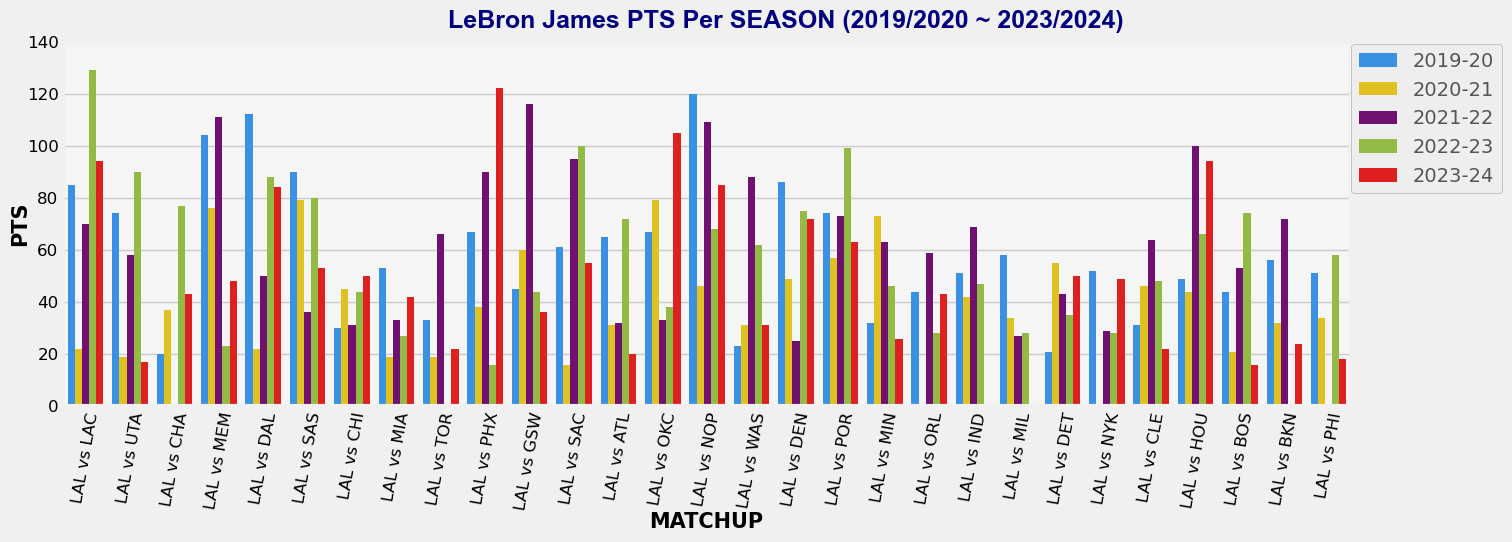

In [28]:
fig, ax = plt.subplots(figsize=(15, 5),constrained_layout=True)
plt.style.use('fivethirtyeight')
sns.set_palette(['dodgerblue', 'gold', 'purple', 'yellowgreen', 'red'])
ax.set_facecolor('whitesmoke')
sns.barplot(ax=ax, data=lebron, x='MATCHUP', y='PTS', hue='SEASON', estimator=np.sum, ci=None)
ax.legend(bbox_to_anchor=(1.125, 1.02), loc=1)
ax.set_xlabel('MATCHUP', color='k', fontsize = 15, fontweight='bold')
ax.set_ylabel('PTS', color='k', fontsize = 15, fontweight='bold')
ax.xaxis.set_label_coords(0.499, -0.29)
ax.yaxis.set_label_coords(-0.026, 0.5)
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params('x', color='k', labelsize=12, labelrotation=80)
ax.tick_params('y', color='k', labelsize=12)
fig.text(0.52, 1.02, 'LeBron James PTS Per SEASON (2019/2020 ~ 2023/2024)', ha='center', va='center', fontsize=18, fontname='Arial', fontweight='bold', color='navy')
#ax.set_xlim([-1, 1])
#ax.set_ylim([-1, 1])
#ax.set_xticks(ax.get_xticks()[1:-1])
#ax.set_xticks(np.arange(0, 0, step=2))
ax.set_yticks(np.arange(0, 141, step=20))
plt.show()